In [1]:
#!conda install -c conda-forge spacy
# packages only available via pip
#!pip install spacy-transformers
#!pip install spacy-lookups-data
#!python -m spacy download en_core_web_sm


In [2]:
import pandas as pd
import spacy
from IPython.display import display, HTML
fname = 'dataset.xlsx'
df = pd.read_excel(fname)
display(HTML(df.sample(10).to_html()))


,Type,Transcription
51,Deceptive,"She constantly cheats at games she doesn’t return my clothes when she borrows them she doesn’t really try hard in school, I think that she just gets people to do her homework for her or she will look off of other people’s tests when she’s taking them. She doesn’t typically do what she says she’s going to. She will tell me that she’s going to call me and then she never does. She has cheated on her significant others in the past she’s not very honest most of the time, she’s kind of a sore loser she doesn’t like to no win and she a lot of the time will do whatever it takes to win, like cheating."
108,Deceptive,"My good friend at home, um we grew up as best friends, we were inseparable, we were always together, we played basketball together, we uh we went to high school together, we played basketball together, we played on travel teams together, we when we went to college we went separate ways um he plays for division one university elsewhere, I play club basketball here, so like even until today we we text we talk on the phone all the time like we compare stats we joke around with ___ stats, who’s doing better, who’s doing worse, um when we go home we hang out, uh we we party together, like he’s always had my back I’ve always had his back, if he needs anything or if I need anything we’re always hear for each other"
152,Deceptive,"This person was actually one of, uh, my two best friends. So, there were three of us and we would always, we were always either at this person or my other friend’s house. And actually at this person’s house, um, was the first time that I saw Austin Powers and I thought I was so cool for, um, for seeing Austin Powers because at the time I was, I was 12 or 11 or something like that and it was PG-13 and I thought it was so cool getting away with it because my parents didn't want me to know it, uh, or my parents didn’t want me to see it, I guess I should say. Uh, but yeah, we would always play ping-pong. Watch, like, R-rated movies at their house and, like, talk about girls, like, go to the movies. Like, when Transformers came out, like, oh, that was the best."
308,Truthful,"We met in fifth fifth grade, fourth grade at school. Um, we weren’t great friends at first, but, uh, we both joined the school band, which was really small and not very good, but we were both, uh, drummers so we sort of bonded that way. We had a lot of common interests like, uh, you know, anime sort of stuff, you know, Yu-Gi-Oh and Naruto, that kind of thing and we’ve we’ve kind of grown out of that, obviously. But we still, uh, we hang out a lot. Um, he doesn’t go here, he goes to NKU but we talk a lot about, you know, things like music, movies, that sort of stuff."
277,Truthful,"Uh, this person is one of my best friends. Uh, I consider him like family. Uh, we’ve been friends for about 12 or 13 years now. We’re very, very close. We speak almost on an everyday basis. Uh, one of the reasons that we’re so close is not just because we grew up together, but we also have similar interests in different type of things. Um, this person is a very good listener. Um, we share the same personality traits, we’re both mean, terrible people sometimes, but we’re really nice, uh, overall. Uh, I consider this person like family just ‘cause of how they been there for me and what they’ve been able to do in my life."
137,Deceptive,"This girl and I um we share clothes all the time, it’s awesome, she has such great style and she doesn’t mind me raiding her closet and you know trying on her stuff, we talk all the time um we do go to different schools but it’s like we never miss a beat you know she’s always there for me when I need her um love talking to her, she’s always like really listens and always knows exactly what to say um you know we shared in the same activities in high school so like I loved being around her and like helping each other out like you know she’d help her with my cheer jobs, I’d help her with her motion s

In [3]:
from collections import Counter

right=0
wrong=0


nlp = spacy.load("en_core_web_sm")

def pos_list(doc, pos):
    pos_list = [token.lemma for token in doc if token.pos_ == pos]
    return Counter(pos_list)

def rwratio(lieword, trueword, counter):
    right = 0
    wrong = 0

    if counter[lieword] > counter[trueword] and label == 'Truthful':
        wrong += 1
    elif counter[lieword] < counter[trueword] and label == 'Deceptive':
        wrong += 1
    elif counter[lieword] != counter[trueword]:
        right += 1
    return right, wrong

def visualizeFeature(name, tcount, fcount):
    labels = ['Truthful', 'Deceptive']
    sizes = [tcount, fcount]
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90, textprops={'color': "black"})
    plt.show()
    print(
        f"{name} {labels[0]} {tcount} {labels[1]} {fcount}")


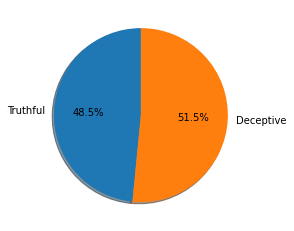

cognitive verbs Truthful 47 Deceptive 50


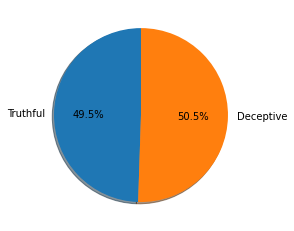

interjections Truthful 710 Deceptive 725


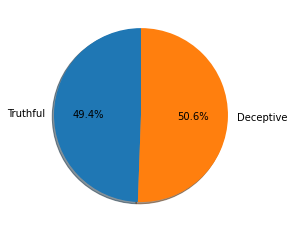

total Truthful 20022 Deceptive 20485


In [4]:
import matplotlib.pyplot as plt

def count_words(doc, type, wordlist):
    alloftype = [token.lower_ for token in doc if token.pos_ == type]
    
    if wordlist:
        alloftype = [x for x in alloftype if x in wordlist]

    return sum(Counter(alloftype).values())




featureTypes=[
    # {
    #     'name':'i-words',
    #     'POS':'PRON',
    #     'wordlist': ['we','i', 'me', 'myself', 'my', 'mine'],
    #     'tcount':0,
    #     'fcount':0
    # },
    # {
    #     'name': 'verbs',
    #     'POS': 'VERB',
    #     'wordlist': None,
    #     'tcount': 0,
    #     'fcount': 0
    # },
    # {
    #     'name': 'articles',
    #     'POS': 'DET',
    #     'wordlist': ['a', 'an', 'the'],
    #     'tcount':0,
    #     'fcount':0
    # },
    # {
    #     'name': 'modal verbs',
    #     'POS': 'AUX',
    #     'wordlist': None,
    #     'tcount': 0,
    #     'fcount': 0
    # },
    {
        'name': 'cognitive verbs',
        'POS': 'VERB',
        'wordlist': ['realize', 'think', 'understand'],
        'tcount': 0,
        'fcount': 0
    },
    {
        'name': 'interjections',
        'POS': 'INTJ',
        'wordlist': None,
        'tcount': 0,
        'fcount': 0
    }
]


twcount = 0
fwcount = 0

for index, row in df.iterrows():
    text = row['Transcription']
    doc = nlp(text)
    label = row['Type']
     



    for feature in featureTypes:
        if label == 'Truthful':
            feature['tcount'] += count_words(doc, feature['POS'], feature['wordlist'])
        else:
            feature['fcount'] += count_words(doc, feature['POS'], feature['wordlist'])

    if label == 'Truthful':
        twcount += len(doc)  
    else:
        fwcount += len(doc) 
     

for feature in featureTypes:
  visualizeFeature(feature['name'], feature['tcount'], feature['fcount'])

visualizeFeature('total', twcount, fwcount)






In [11]:
from autonlp import AutoNLP
client = AutoNLP()
client.login(token="api_SZNQbwgFYpJfCPBtJChPznmiWqHrTWtpRm")

project = client.create_project(name="lie_detection", task="binary_classification", language="en", max_models=5)


> INFO    🗝 Successfully logged in as veliander
> INFO    🗝 Storing credentials in:  /Users/mpd/.autonlp
> INFO    🤙 Project 'lie_detection' already exists, it was loaded successfully.
> INFO    🔄 Refreshing project status...
> INFO    🔄 Refreshing uploaded files information...
> INFO    🔄 Refreshing models information...
> INFO    🔄 Refreshing cost information...


In [15]:
#project.train()
project.refresh()
print(project)


> INFO    🔄 Refreshing project status...
> INFO    🔄 Refreshing uploaded files information...
> INFO    🔄 Refreshing models information...
> INFO    🔄 Refreshing cost information...
> INFO    🔎 Calculating a cost estimate for the training...



💰 The training cost for this project will be in this range:
 USD 7.5 to USD 12.5

 Once training is complete, we will send you an email invoice for the actual training cost within that range.



KeyboardInterrupt: Interrupted by user

In [ ]:

client.predict(project="lie_detection",
               model_id=42, input_text="I know this one girl who I really don’t like. I met her when we were in middle school and unfortunately was stuck with her all the way through high school. And what I really don’t like about her is that she’s really opinionated and she’s not okay with anybody else’s opinion. So she’s the kind of person where it seems like you’re going to be really good friends until there’s one thing that you disagree over, and then that’s it. And she tries to turn everybody against you, so as soon as you’ve done one thing to tick her off she runs around trying to get everybody else to think that you’re this horrible person and I find that really unattractive in people."
               )


In [6]:
!pip install AutoNLP

  Using cached autonlp-0.3.7-py3-none-any.whl (35 kB)
  Using cached huggingface_hub-0.0.12-py3-none-any.whl (37 kB)
  Using cached requests-2.25.1-py2.py3-none-any.whl (61 kB)
  Using cached prettytable-2.0.0-py3-none-any.whl (22 kB)
  Using cached loguru-0.5.3-py3-none-any.whl (57 kB)
  Using cached datasets-1.11.0-py3-none-any.whl (264 kB)
  Using cached tqdm-4.49.0-py2.py3-none-any.whl (69 kB)
     |████████████████████████████████| 128 kB 7.3 MB/s 
  Using cached fsspec-2021.11.0-py3-none-any.whl (132 kB)
  Using cached dill-0.3.4-py2.py3-none-any.whl (86 kB)
     |████████████████████████████████| 19.1 MB 21.4 MB/s 
  Using cached idna-2.10-py2.py3-none-any.whl (58 kB)
  Using cached chardet-4.0.0-py2.py3-none-any.whl (178 kB)
  Attempting uninstall: idna
    Found existing installation: idna 3.2
    Uninstalling idna-3.2:
      Successfully uninstalled idna-3.2
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.62.3
    Uninstalling tqdm-4.62.3:
      Successfu